In [2]:
!pip install imutils

import os
import re
import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
import importlib

import itertools
import random

# files
import utils
import synteticDS
# import dataset 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [21]:
# Load the dataset

train_data_path= "../../data/imgs/artificial/all"
circle_img_paths=[]
blob_img_paths=[]
# shard_img_paths=[]
fibers_img_paths=[]
all_img_paths=[]
# for root, dirs, files in os.walk(train_data_path, topdown=False):
root, dirs, files = next(os.walk(train_data_path))
for dirTemp in dirs:
    dirTemp=os.path.join(root, dirTemp)
    for  roott, dirss, files in os.walk(dirTemp):
        for name in files:
    #         if re.findall('particleCutouts.*.jpg', root+name): 
            if re.findall('.jpg', roott+name):  
                imgPath = os.path.join(roott,name)
                if re.findall('cracks', imgPath):
                    fibers_img_paths.append(imgPath) 
                elif re.findall('rBlobs', imgPath):
                    blob_img_paths.append(imgPath)        
                elif re.findall('rCircles', imgPath):
                    circle_img_paths.append(imgPath)    
        break
all_img_paths.append(fibers_img_paths) 
all_img_paths.append(blob_img_paths) 
all_img_paths.append(circle_img_paths)
if not all_img_paths:
    print("err loading ",train_data_path)
else:
    print("circles ",len(circle_img_paths))    
    print("blobs ",len(blob_img_paths))    
    print("fibers ",len(fibers_img_paths))

circles  321
blobs  356
fibers  546


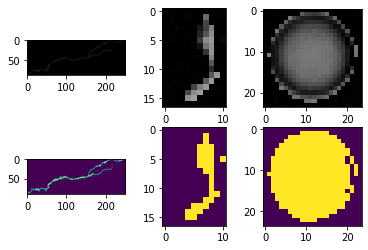

(89, 250, 3)


In [4]:
fig, axarr = plt.subplots(2,3)

for idx, classList in enumerate(all_img_paths):
    image = cv2.imread(classList[0])
    imageMask = utils.getMask(image,threshold=4,kernelSize=1) 
    # listContours = markContours(imageMask) 
#     imgContours = utils.img2segmented(imageMask)
    
#     axarr[idx].imshow(imgContours)
    axarr[0][idx].imshow(image)
    axarr[1][idx].imshow(imageMask)
    
plt.show()
#     a=np.unique(imgContours)
print(cv2.imread(fibers_img_paths[0]).shape)

In [26]:
import copy 
importlib.reload(synteticDS)

# train_data_path= all_img_paths
savePath ="../../data/imgs/artificial/all"
# #  all_img_paths= "../../data/imgs/artificial/* "
# imgBackupParticlesPaths= all_img_paths
# imgWaferParticlesPaths= synteticDS.getPaths("../../data/imgs/artificial/waferCracks_Particles/",False)

# imgWaferPaths= synteticDS.getPaths("../../data/imgs/wafer/in/")
# randomWaferPaths = random.choices(imgWaferPaths, k=70)
# background = synteticDS.backgroundFrameMean(randomWaferPaths,125)
allImgPaths=[]
for dataset in all_img_paths: # same ratios of particle types
    randomParticlePaths = random.choices(dataset, k=200)
    allImgPaths.append(randomParticlePaths)

imgPaths=  list(itertools.chain.from_iterable(allImgPaths)) 
numberOfParticlesInImg= 100  #randint(0, 50)
for i in range(10):
    particle_examples = random.choices(imgPaths, k=numberOfParticlesInImg)

    genImg,_ = synteticDS.generate_image(particle_examples, numberOfParticlesInImg)
    savePathTemp= os.path.join(savePath,"result",'waferCracks'+str(i)+'.jpg')

    cv2.imwrite(savePathTemp, genImg)
#     cv2.imwrite(savePath2, genImg2)
plt.imshow(genImg)
plt.show()  

KeyboardInterrupt: 

In [ ]:
# TODO segMaskCombine


In [ ]:
# TODO masks to coco
# TODO segMaskCombine
# save (cocoView, segMaskCombine, genImage) -> send to F,A,E



2 (2, 5) (2, 2)


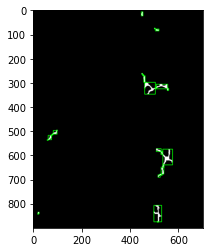

In [82]:
image = cv2.imread(all_img_paths[0][0])
imageMask = utils.getMask(image,threshold=100,kernelSize=10) 
contours = cv2.findContours(imageMask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) # img, contours, hierarchy

labelsCount, _, values, centroids=  cv2.connectedComponentsWithStats(imageMask) 
print(labelsCount, values.shape, centroids.shape)

contoursImg = np.zeros(image.shape, dtype=np.uint8)
axSize = math.sqrt(labelsCount)
fig, axarr = plt.subplots(1,3)

for i,cnt in enumerate(contours[0]): # iterate through contours
    if i > 0:  # skip background
        contour = cnt.squeeze()
        """ coco features """
#         image0 = np.zeros(image.shape, dtype=np.uint8)

        moments = cv2.moments(contour)
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
        
        BBox = cv2.boundingRect(contour)  # cv2.rectangle(contoursImg,(BBox[0],BBox[1]),(BBox[0]+BBox[2],BBox[1]+BBox[3]),(0,255,0),2)
        area = cv2.contourArea(contour)
        
        cv2.rectangle(contoursImg,(BBox[0],BBox[1]),(BBox[0]+BBox[2],BBox[1]+BBox[3]),(0,255,0),2)
        contoursImg = cv2.drawContours(contoursImg, contours[0],i,(255,255,255), thickness=cv2.FILLED)


plt.imshow(contoursImg)
plt.show()
    

# plot_intensity_histogram(image) 

In [ ]:
if ( h/w ratio >x || <x) || contour length/convex hull ratio